# This notebook shows how to perform mutations on generated sequences and visualize mutational steps.
#### It uses the synthetic sequences file generated via FLY_KC_EFS notebook.
#### It consists of:
* Printing DNA sequences in nucleotide letters for different mutational steps.
* Applying mutations to selected position and substation.
* Plotting the findings.
#### Figures are saved to ./figures/repressors

### General imports


In [1]:
import sys  
import os
import pickle
import utils
import numpy as np
import scipy
import tensorflow as tf
tf.disable_eager_execution()
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("default")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

### Loading DeepFlyBrain data to be used for the initialization of shap.DeepExplainer


In [2]:
print('Loading data...')
f = open('./data/deepflybrain/DeepFlyBrain_nonAugmented_data.pkl', "rb")
nonAugmented_data_dict = pickle.load(f)
f.close()

Loading data...


### Loading the model and initializing shap.DeepExplainer


In [3]:
print('Loading model...')
import shap
tf.disable_eager_execution()
rn=np.random.choice(nonAugmented_data_dict["train_data"].shape[0], 250, replace=False)
model_dict = {}
exp_dict = {} 

name = "DeepFlyBrain"
model_json_file = "models/deepflybrain/model.json"
model_hdf5_file = "models/deepflybrain/model_epoch_83.hdf5"
model_dict[name] = utils.load_model(model_json_file, model_hdf5_file)
exp_dict[name] = shap.DeepExplainer((model_dict[name].inputs, model_dict[name].layers[-1].output), nonAugmented_data_dict["train_data"][rn])


Loading model...


In [4]:
nuc_to_onehot = {"A":[1, 0, 0, 0],"C":[0, 1, 0, 0],"G":[0, 0, 1, 0],"T":[0, 0, 0, 1]}

### Loading the generated sequences via in silico evolution


In [5]:
import pickle
f = open("data/deepflybrain/FLY_KC_EFS_6000_withmut.pkl", "rb")
evolved_seq_6000_dict = pickle.load(f)
f.close()

### Applying mutations to selected position and substation to create repressor binding sites on fully evolved sequences

0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,

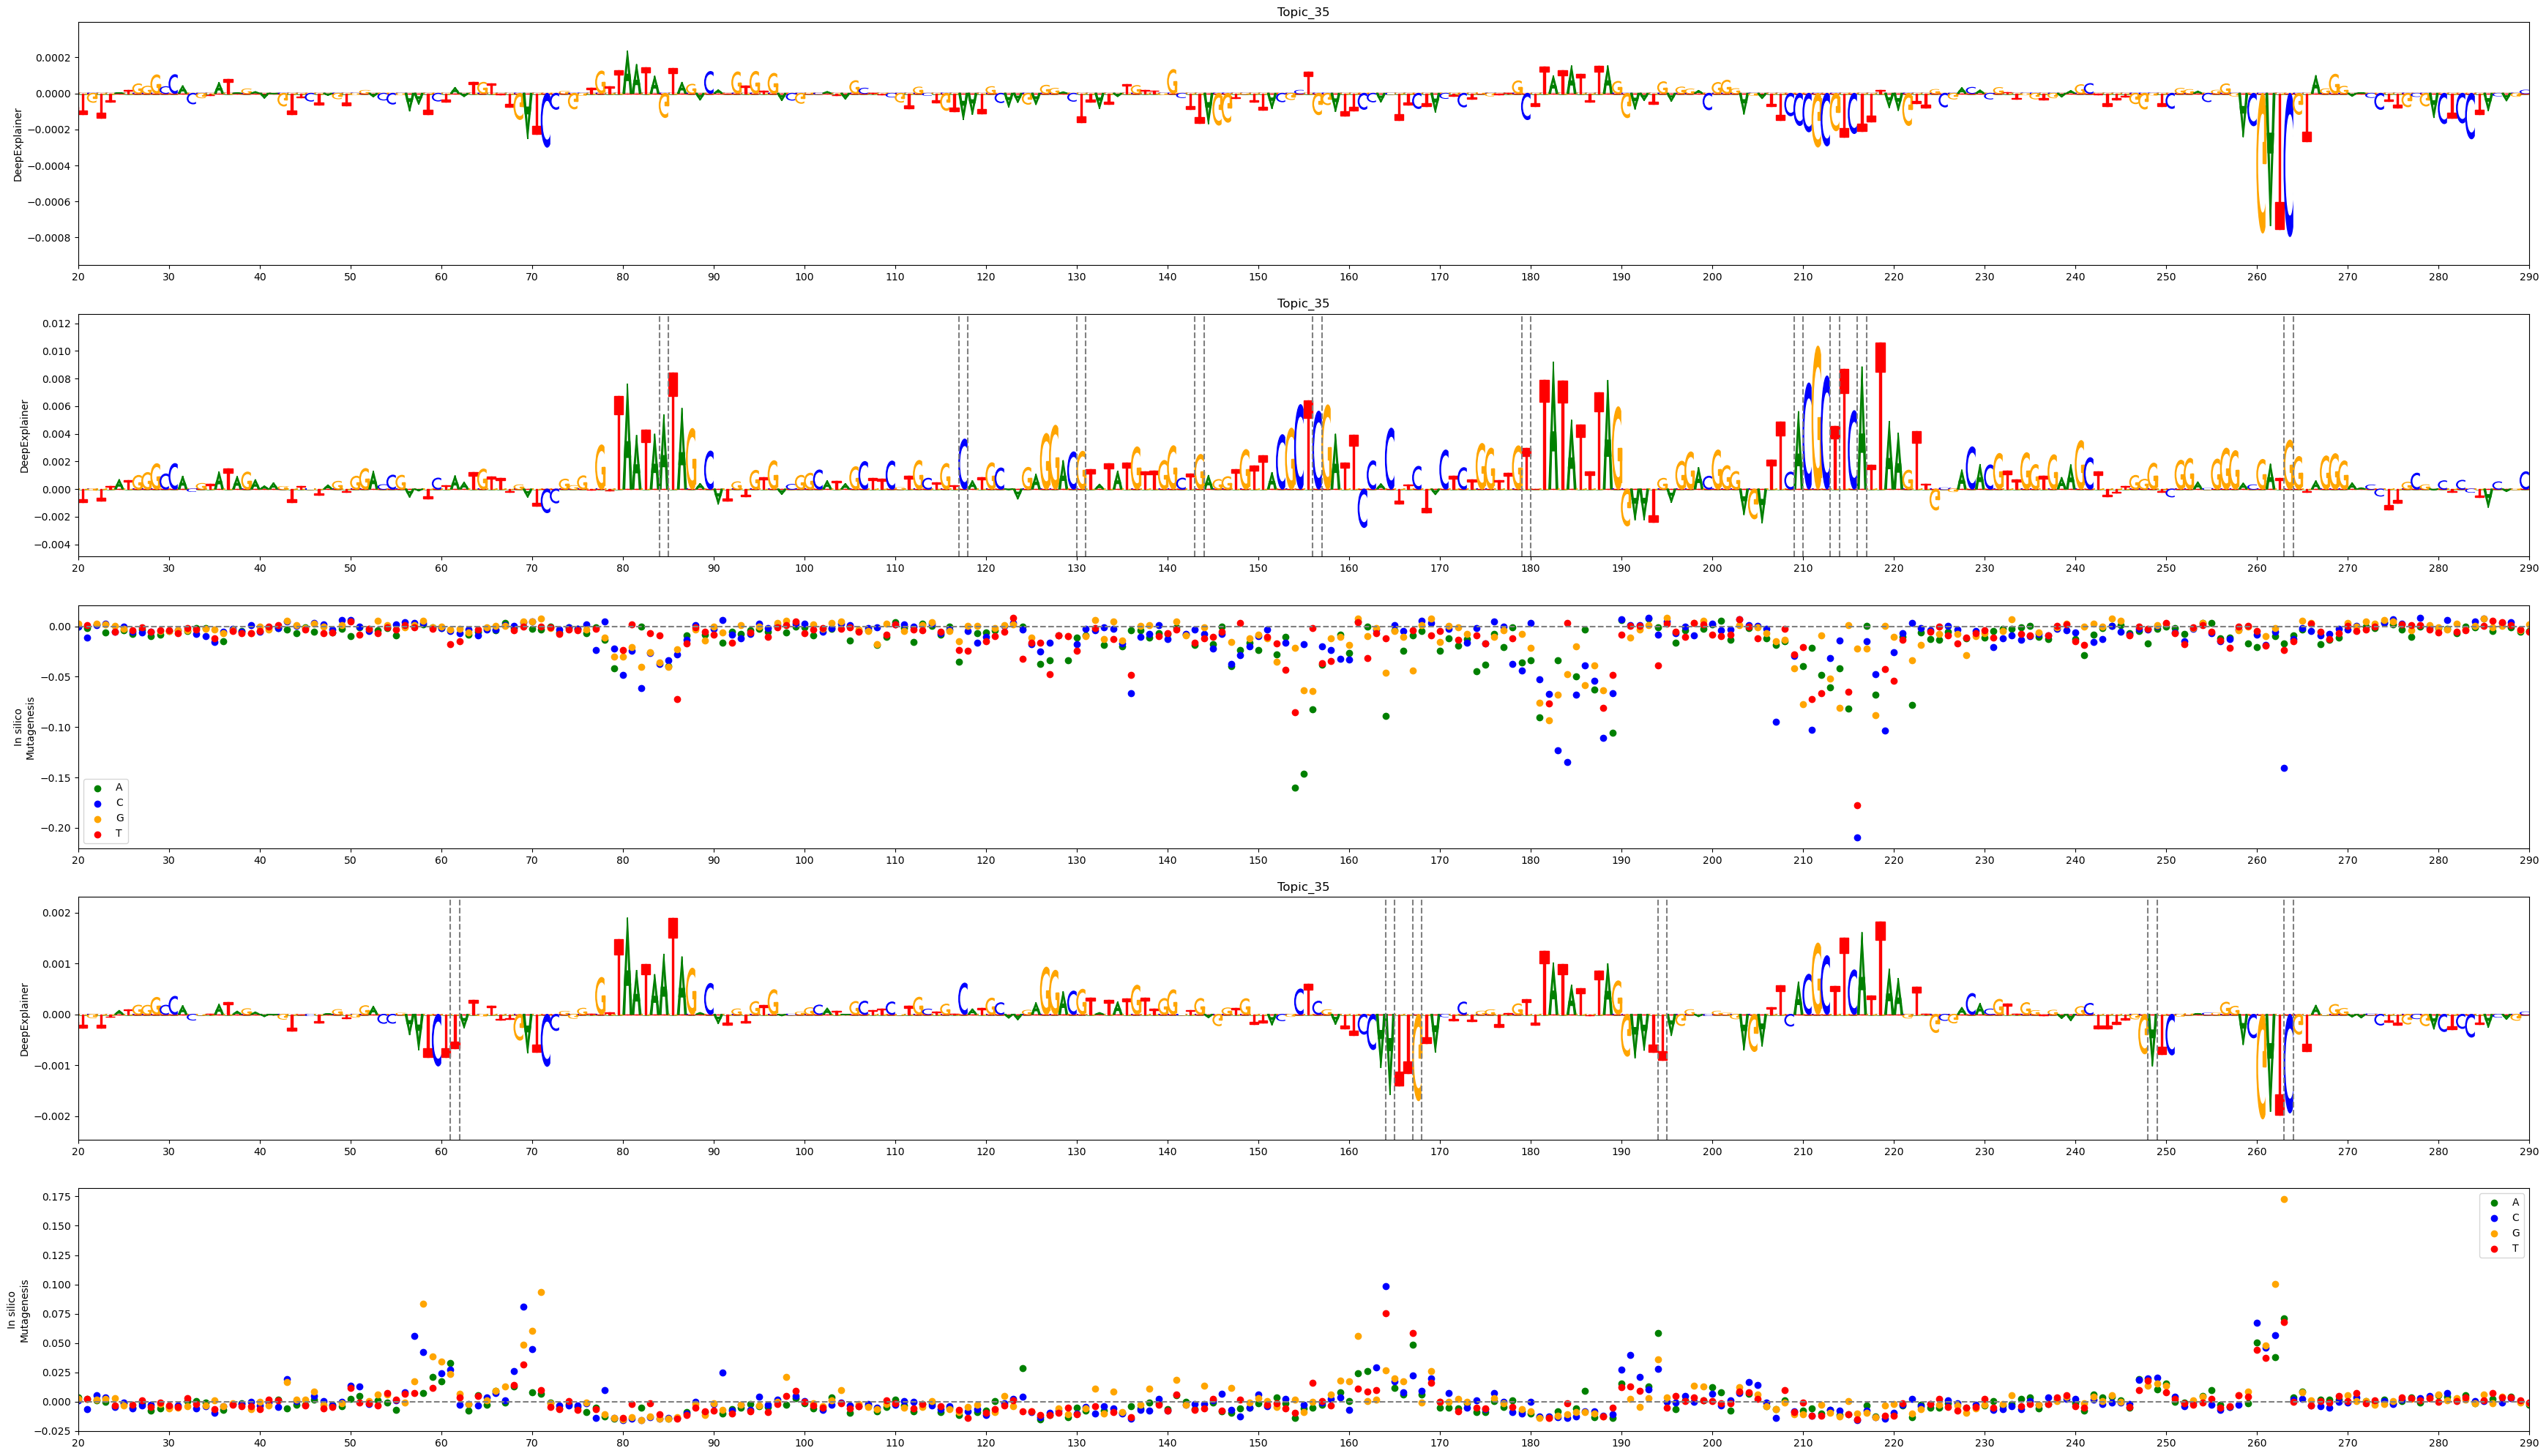

In [9]:
#[1,21,32,35,59,61,91]
id_ = 32
st = 20
end = 290
ntrack = 5
fig = plt.figure(figsize=(43.2,ntrack*5))


start_x = np.copy(evolved_seq_6000_dict["X"][id_:id_+1])
ax1 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=start_x, class_no = 35)
for i, mut_ in enumerate(evolved_seq_6000_dict["mut_loc"][id_][:10]):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
ax2 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=2, seq_onehot=start_x, class_no = 35)
ax_ = utils.plot_mutagenesis_givenax(model=model_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=3, seq_onehot=start_x, class_no = 35)
for i, mut_ in enumerate(evolved_seq_6000_dict["mut_loc"][id_][:10]):    
    ax2.axvline(x=int(mut_.split("_")[0]),linestyle="--",color="gray")
    ax2.axvline(x=int(mut_.split("_")[0])+1,linestyle="--",color="gray")
ax1.set_xlim([st,end])
ax2.set_xlim([st,end])
ax_.set_xlim([st,end])

muts = ["194_T","164_A","263_C","167_G","248_A","61_T"]
for i, mut_ in enumerate(muts):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
ax1 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=4, seq_onehot=start_x, class_no = 35)
ax_ = utils.plot_mutagenesis_givenax(model=model_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=5, seq_onehot=start_x, class_no = 35)
muts = ["194_T","164_A","263_C","167_G","248_A","61_T"]
for i, mut_ in enumerate(muts):
    ax1.axvline(x=int(mut_.split("_")[0]),linestyle="--",color="gray")
    ax1.axvline(x=int(mut_.split("_")[0])+1,linestyle="--",color="gray")
ax1.set_xlim([st,end])
ax_.set_xlim([st,end])

plt.savefig("figures/repressors/KC_EFS_3_Repressors_DeepExplainer.pdf",transparent=True)


### Printing nucleotide sequences of fully-evolved and repressor-added sequences 

In [11]:
id_ = 32
start_x = np.copy(evolved_seq_6000_dict["X"][id_:id_+1])
for i, mut_ in enumerate(evolved_seq_6000_dict["mut_loc"][id_][:10]):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
muts = ["194_T","164_A","263_C","167_G","248_A","61_T"]
for i, mut_ in enumerate(muts):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
print("")
for nuc in start_x[0]:
    if nuc[0]==1:
        print("A",end="")
    if nuc[1]==1:
        print("C",end="")
    if nuc[2]==1:
        print("G",end="")
    if nuc[3]==1:
        print("T",end="")
print("")


ACCGAAAAATCAGTAGCTTTTGTTATGGGCCACGTATAGAAAGTTCTAGTGGACCGAATCTTATGTTTGATCCGGGTGTTAATAATAGACATGTGTGACGGCATAGCTTCGTGCTGTCATGCAAGAGGACGTATATGTTGGCTGAGGTGTTACGCTCGATTCCAATTGTACTCTGGTTGTTTATATTTAGGAATTAGGACGGGAGATTCACGCTTCATTAAGTTGCGACACGTTGGTGAAGCTTTTGGATCGGACGGGACGATCGTAGGGAACCTTGCGACTCCTACAGCCAGTTCGCTCTTGTTTTACTACTTTCCTCGATAACGAATGCGTATATATGTCATATAGAAGCATCCCCTGGTCTAAGTTCTTGAATCCAACCGGCCGCAGACTTAGATGTCGGCTTGCACTTGAATATGGCAATTTATTCCAACCAGGATACCATGTCAGCCTTAAATCAAAACCGTATGTCTAGGGTTAATATTCCGATGACGTAAATT


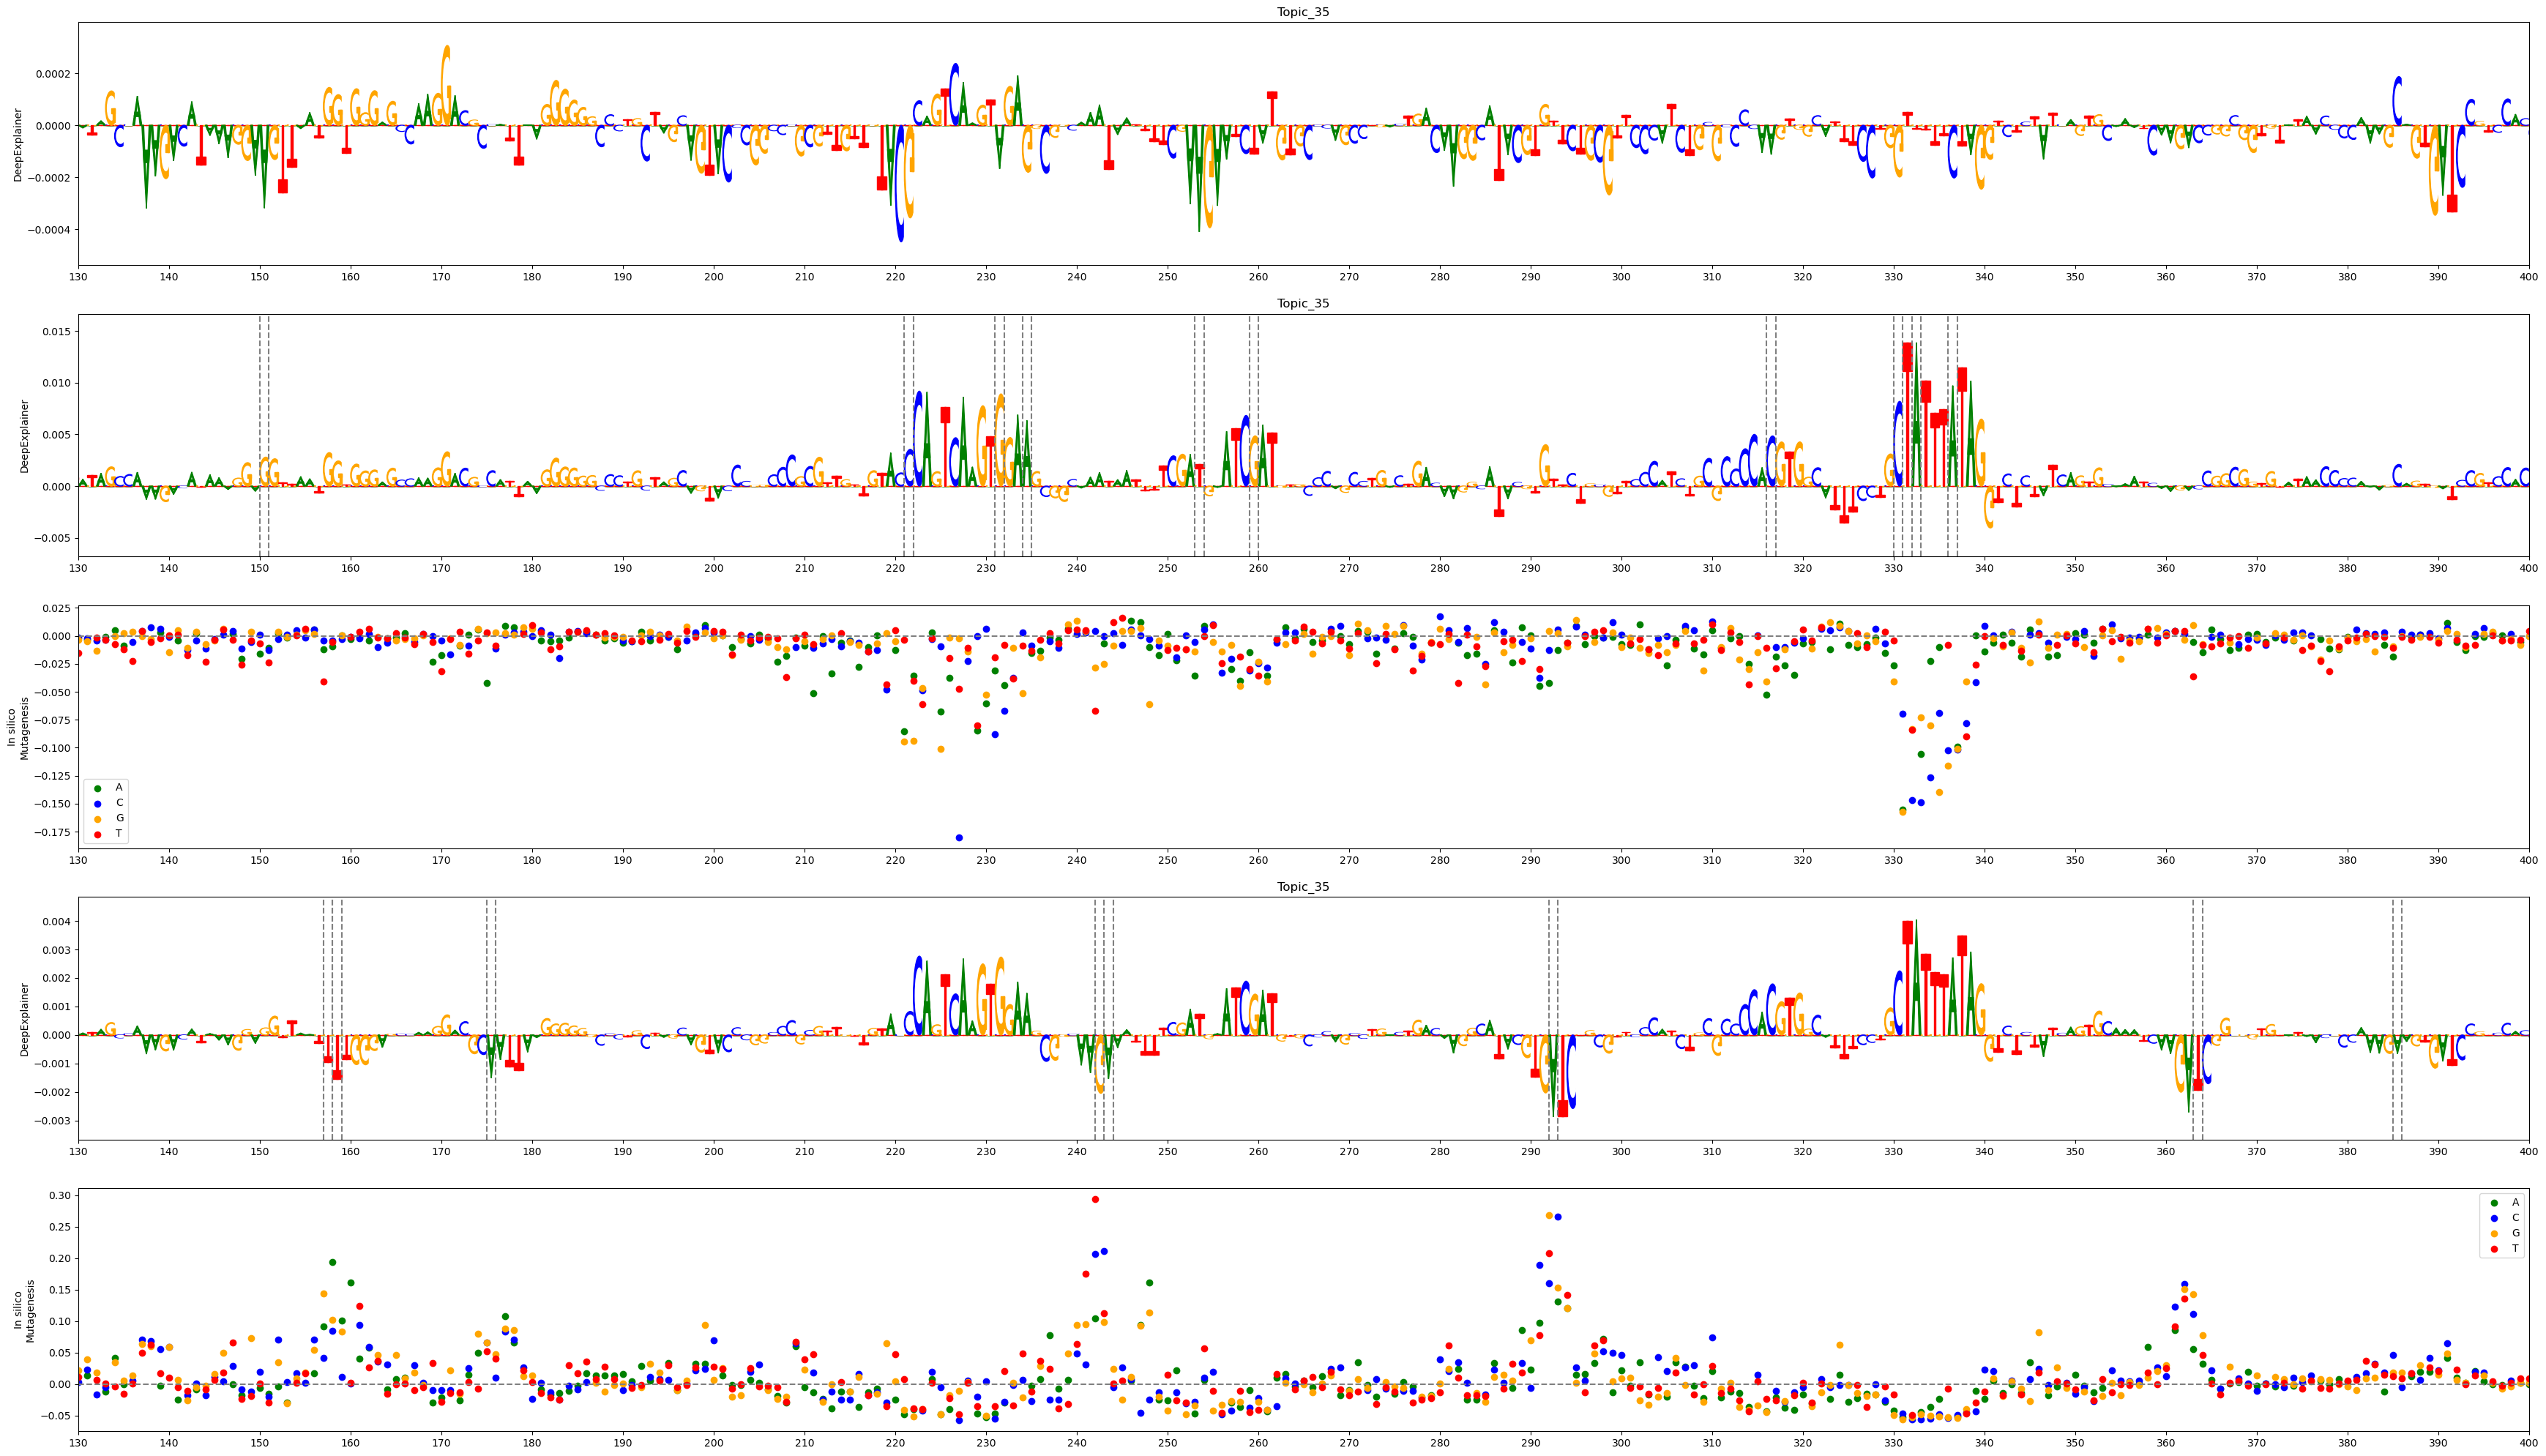

In [12]:
#[1,21,32,35,59,61,91]
id_ = 35
st = 130
end = 400
ntrack = 5
fig = plt.figure(figsize=(43.2,ntrack*5))


start_x = np.copy(evolved_seq_6000_dict["X"][id_:id_+1])
ax1 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=start_x, class_no = 35)
for i, mut_ in enumerate(evolved_seq_6000_dict["mut_loc"][id_][:10]):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
ax2 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=2, seq_onehot=start_x, class_no = 35)
ax_ = utils.plot_mutagenesis_givenax(model=model_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=3, seq_onehot=start_x, class_no = 35)
for i, mut_ in enumerate(evolved_seq_6000_dict["mut_loc"][id_][:10]):    
    ax2.axvline(x=int(mut_.split("_")[0]),linestyle="--",color="gray")
    ax2.axvline(x=int(mut_.split("_")[0])+1,linestyle="--",color="gray")
ax1.set_xlim([st,end])
ax2.set_xlim([st,end])
ax_.set_xlim([st,end])

muts = ["242_G","175_A","157_T","363_T","292_A","158_T","385_A","243_A"]
for i, mut_ in enumerate(muts):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
ax1 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=4, seq_onehot=start_x, class_no = 35)
ax_ = utils.plot_mutagenesis_givenax(model=model_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=5, seq_onehot=start_x, class_no = 35)
muts = ["242_G","175_A","157_T","363_T","292_A","158_T","385_A","243_A"]
for i, mut_ in enumerate(muts):
    ax1.axvline(x=int(mut_.split("_")[0]),linestyle="--",color="gray")
    ax1.axvline(x=int(mut_.split("_")[0])+1,linestyle="--",color="gray")
ax1.set_xlim([st,end])
ax_.set_xlim([st,end])

plt.savefig("figures/repressors/KC_EFS_4_Repressors_DeepExplainer.pdf",transparent=True)


In [13]:
id_ = 35
start_x = np.copy(evolved_seq_6000_dict["X"][id_:id_+1])
for i, mut_ in enumerate(evolved_seq_6000_dict["mut_loc"][id_][:10]):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
muts = ["242_G","175_A","157_T","363_T","292_A","158_T","385_A","243_A"]
for i, mut_ in enumerate(muts):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
print("")
for nuc in start_x[0]:
    if nuc[0]==1:
        print("A",end="")
    if nuc[1]==1:
        print("C",end="")
    if nuc[2]==1:
        print("G",end="")
    if nuc[3]==1:
        print("T",end="")
print("")



AATGGTTCCACATTACAGTTACCATACCGAGGAACTGAACAGATAATTACTTCATCAATCGAACCCTTACATCAGGTCTAGACAAATGTCAGGGGGTGTCGCAAATTGCCGTTTATAGTCAGTATTTCATATAGCCAAAGACATAAAGGAGGTTAATTTTGGGAGCCAAGGACGCAATTAAGGGGGGCCCTGCTAGCAGTACCCGGCCCGCGTTGTTGTACCCAGTCAAGTGGAAGCGGCAAGAAATTTTCGATGAATCGATGTGCCCAGCCTGACTGACAAGGCATACGTGATCTGCGTTCCCATCTGCGCCCCACGTGGCATTTCCTGCTATTTATAGGTCTCTATCAGTGCAAATCAAGATCGGCGGTGTATAACCCCAAAGAAGTGATCCGTCCACCCTGCGAAGGTTCTTGCTAATGGCATGGTGTCACCAAGTTTATTGTCAAGTTGATAGCGAACGGGTCAATAATCCTTGGGCGAAAATTATGCTTGCGGAT


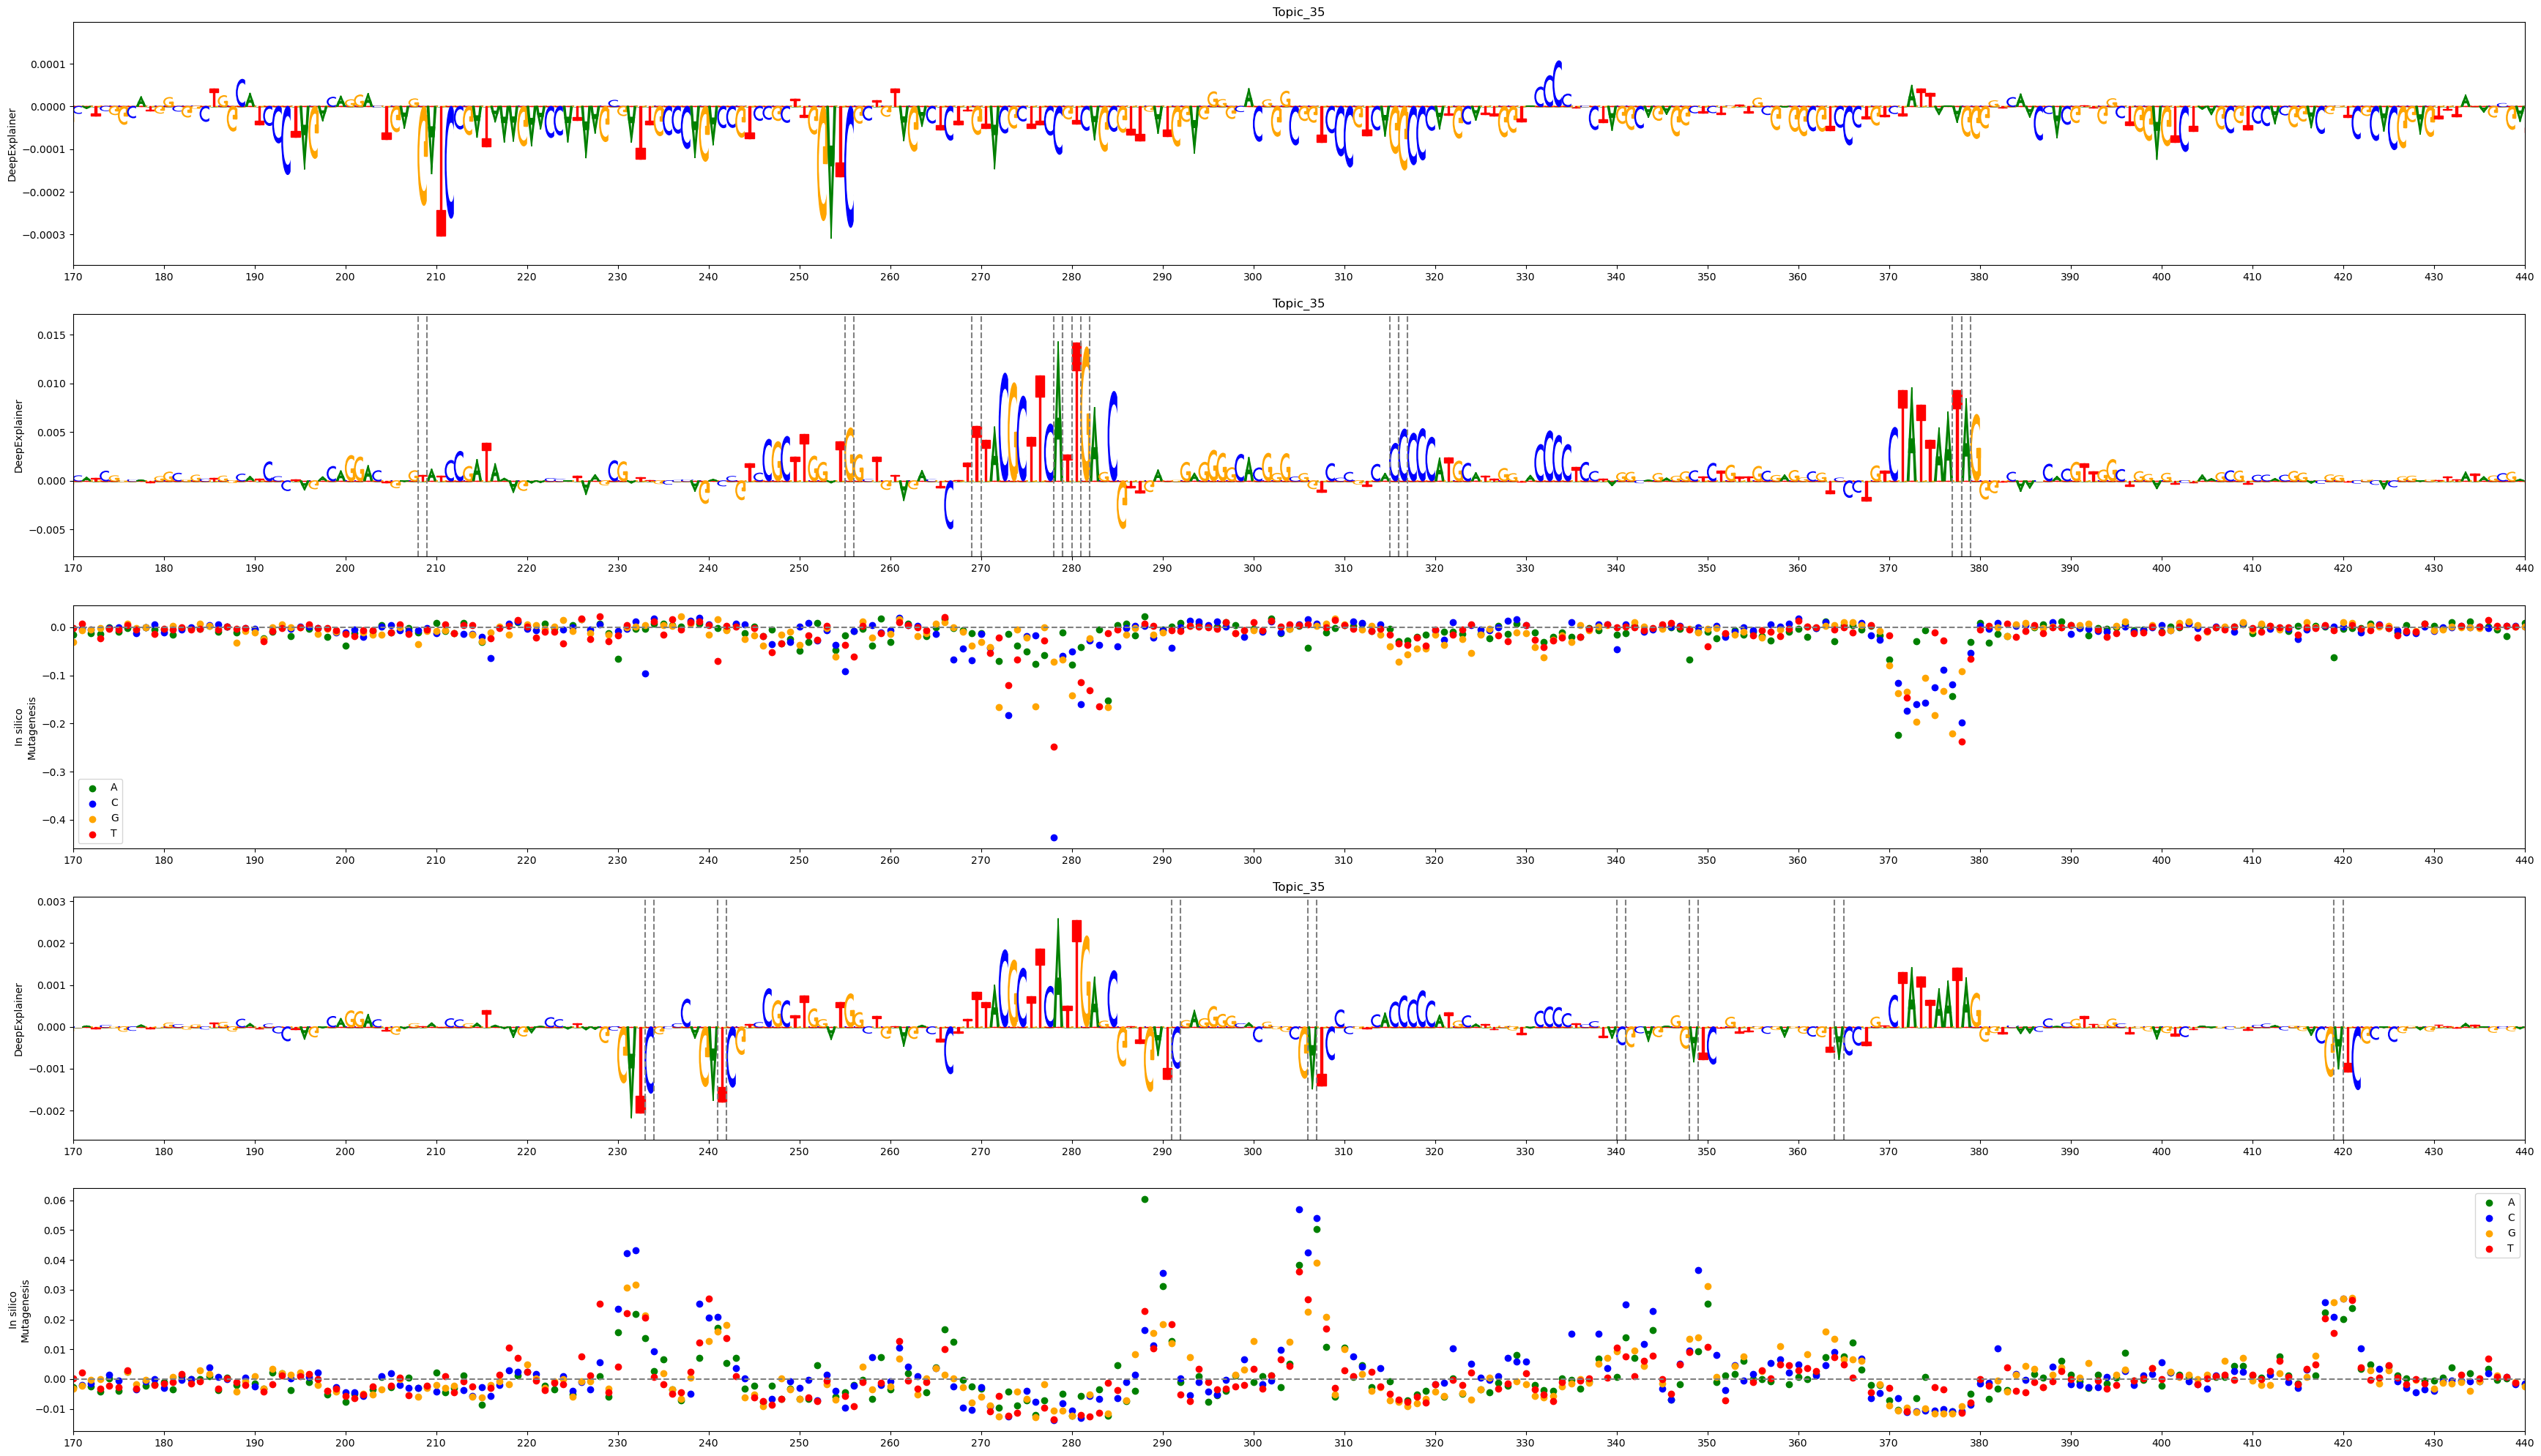

In [14]:
#[1,21,32,35,59,61,91]
id_ = 91
st = 170
end = 440
ntrack = 5
fig = plt.figure(figsize=(43.2,ntrack*5))


start_x = np.copy(evolved_seq_6000_dict["X"][id_:id_+1])
ax1 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=start_x, class_no = 35)
for i, mut_ in enumerate(evolved_seq_6000_dict["mut_loc"][id_][:10]):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
ax2 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=2, seq_onehot=start_x, class_no = 35)
ax_ = utils.plot_mutagenesis_givenax(model=model_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=3, seq_onehot=start_x, class_no = 35)
for i, mut_ in enumerate(evolved_seq_6000_dict["mut_loc"][id_][:10]):    
    ax2.axvline(x=int(mut_.split("_")[0]),linestyle="--",color="gray")
    ax2.axvline(x=int(mut_.split("_")[0])+1,linestyle="--",color="gray")
ax1.set_xlim([st,end])
ax2.set_xlim([st,end])
ax_.set_xlim([st,end])

muts = ["233_C","241_T","291_C","306_A","340_C","348_A","364_A","419_A"]
for i, mut_ in enumerate(muts):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
ax1 = utils.plot_deepexplainer_givenax(explainer=exp_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=4, seq_onehot=start_x, class_no = 35)
ax_ = utils.plot_mutagenesis_givenax(model=model_dict["DeepFlyBrain"], fig=fig, ntrack=ntrack, track_no=5, seq_onehot=start_x, class_no = 35)
muts = ["233_C","241_T","291_C","306_A","340_C","348_A","364_A","419_A"]
for i, mut_ in enumerate(muts):
    ax1.axvline(x=int(mut_.split("_")[0]),linestyle="--",color="gray")
    ax1.axvline(x=int(mut_.split("_")[0])+1,linestyle="--",color="gray")
ax1.set_xlim([st,end])
ax_.set_xlim([st,end])

plt.savefig("figures/repressors/KC_EFS_7_Repressors_DeepExplainer.pdf",transparent=True)


In [15]:
id_ = 91
start_x = np.copy(evolved_seq_6000_dict["X"][id_:id_+1])
for i, mut_ in enumerate(evolved_seq_6000_dict["mut_loc"][id_][:10]):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
muts = ["233_C","241_T","291_C","306_A","340_C","348_A","364_A","419_A"]
for i, mut_ in enumerate(muts):
    start_x[0][int(mut_.split("_")[0]),:] = np.array(nuc_to_onehot[mut_.split("_")[1]], dtype='int8')
print("")
for nuc in start_x[0]:
    if nuc[0]==1:
        print("A",end="")
    if nuc[1]==1:
        print("C",end="")
    if nuc[2]==1:
        print("G",end="")
    if nuc[3]==1:
        print("T",end="")
print("")



AATTTGTTTTAAAAGAACCCACTTAGTATCTCATTCGAGGTAGGCTGGTATTGGATTCCCTGCGGTGGCATGCTCCATATTTTGTATAGAAGCCATAGTTTGAAAAACGGTTCCACTTGACGACTAAATCACTTCGGTGTCTTCCCTCAACCACGTATCCGAAAATCCAGCATCGGCATGGCGGCTGGCATCCCTAGACAGGACTGAGTATCCGATAAAGAACCATAAGCGATCGCCCAGATCGTCCGCTTGGATGGCTGTAGACTCTTTTACGCTTCATTGAGCGTTGATCGAGGGGCACGGGCGATCCCGTCACCCCCATGCATTGGTACCCCTCCTACGCAGAGGATCTGTTGCGAGGCGTACCTGTCTATTAATAGGGTCAACCACGTTGGCTGGAGTCTAAGCGTCCACGGACGATCGCACGGAGTTTATAGCGATTAGAATGTAAGGAAGATATGTGGATTCGTACTTCATCCCCTACTTACGTACGCAAGAGC
